In [1]:
import numpy as np
import pandas as pd

In [2]:
losses = {}

In [9]:
data = 'mh'
quality = 'worse'
file = np.load('/vision/shuhan/projects/imitation/mix_demo/results/action_variance_can/test_loss_bc_uniform_proficient_20_percent/losses_{}_{}.npy'.format(data, quality), allow_pickle=True).item()
print(file.keys())
for k in file.keys():
    print('item of key {} length {}'.format(k, len(file[k])))
losses[quality] = file[quality]

dict_keys(['worse', 'okay', 'better'])
item of key worse length 30439
item of key okay length 0
item of key better length 0


In [11]:
data = 'mh'
quality = 'okay'
file = np.load('/vision/shuhan/projects/imitation/mix_demo/results/action_variance_can/test_loss_bc_uniform_proficient_20_percent/losses_{}_{}.npy'.format(data, quality), allow_pickle=True).item()
print(file.keys())
for k in file.keys():
    print('item of key {} length {}'.format(k, len(file[k])))
losses[quality] = file[quality]

dict_keys(['worse', 'okay', 'better'])
item of key worse length 0
item of key okay length 18053
item of key better length 0


In [12]:
data = 'mh'
quality = 'better'
file = np.load('/vision/shuhan/projects/imitation/mix_demo/results/action_variance_can/test_loss_bc_uniform_proficient_20_percent/losses_{}_{}.npy'.format(data, quality), allow_pickle=True).item()
print(file.keys())
for k in file.keys():
    print('item of key {} length {}'.format(k, len(file[k])))
losses[quality] = file[quality]

dict_keys(['worse', 'okay', 'better'])
item of key worse length 0
item of key okay length 0
item of key better length 14264


In [13]:
data = 'ph'
quality = '20_percent'
file = np.load('/vision/shuhan/projects/imitation/mix_demo/results/action_variance_can/test_loss_bc_uniform_proficient_20_percent/losses_{}_{}.npy'.format(data, quality), allow_pickle=True).item()
print(file.keys())
for k in file.keys():
    print('item of key {} length {}'.format(k, len(file[k])))
losses['proficient_20_percent'] = file[quality]

dict_keys(['worse', 'okay', 'better', '20_percent'])
item of key worse length 0
item of key okay length 0
item of key better length 0
item of key 20_percent length 4617


In [14]:
for k, v in losses.items():
    print('Key {}, length {}. Loss mean {}, std {}, min {}, max {}'.format(
        k, len(v), np.mean(v), np.std(v), np.min(v), np.max(v)
    ))

Key worse, length 30439. Loss mean 61122.159703335, std 513684.74561238266, min -23.450918197631836, max 10435285.0
Key okay, length 18053. Loss mean 1115.9494205455062, std 11991.64681433469, min -24.138328552246094, max 354502.0625
Key better, length 14264. Loss mean 202.27661161704864, std 623.5820300522706, min -33.59550094604492, max 26336.658203125
Key proficient_20_percent, length 4617. Loss mean -10.446854833841892, std 86.2713984857117, min -35.69771957397461, max 3506.10205078125


In [9]:
num_intervals = 100

for k, v in losses.items():
    #min_val, max_val = int(np.floor(np.min(v).item())), int(np.floor(np.max(v).item()))
    min_val, max_val = -25, 1000
    stride = (max_val - min_val) // num_intervals
    intervals = [int(x) for x in range(min_val, max_val, stride)]
    se = pd.cut(v, intervals)
    print('========================== Statistics for demo {} =========================='.format(k))
    print(se.value_counts())
    break

========================== Statistics for demo worse ==========================
(-25, -15]    129
(-15, -5]     579
(-5, 5]       890
(5, 15]       863
(15, 25]      847
             ... 
(945, 955]     49
(955, 965]     37
(965, 975]     36
(975, 985]     32
(985, 995]     30
Length: 102, dtype: int64


0.04162962962962963


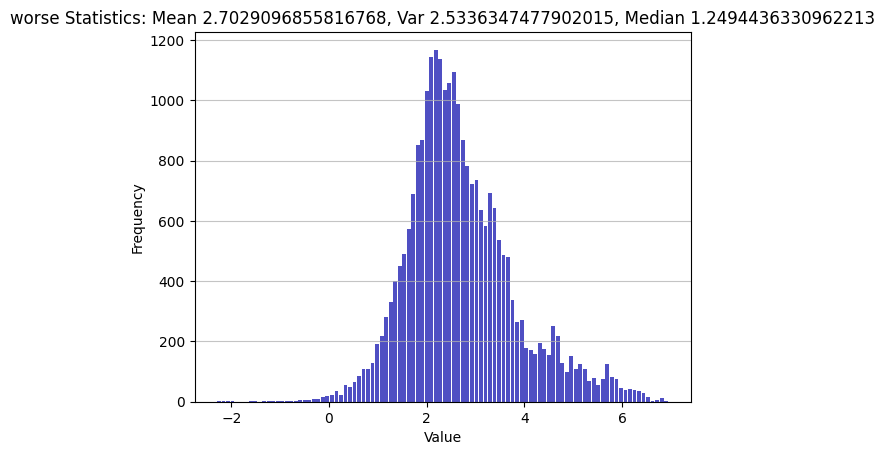

0.051666666666666666


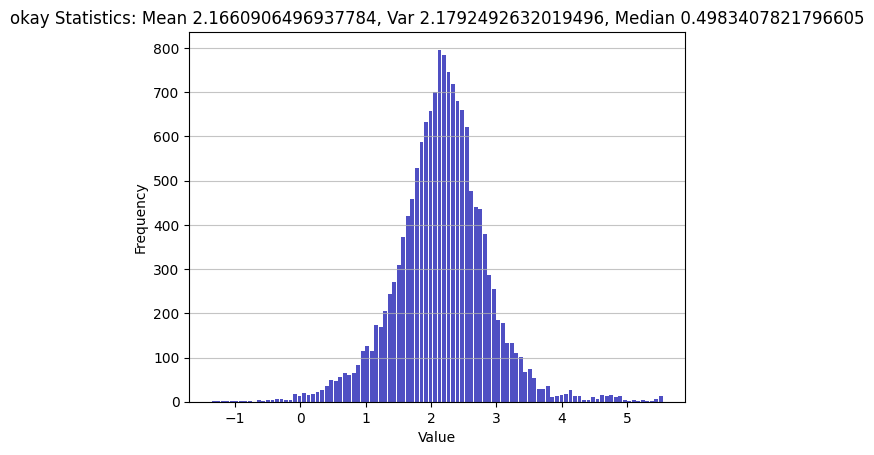

0.201796875


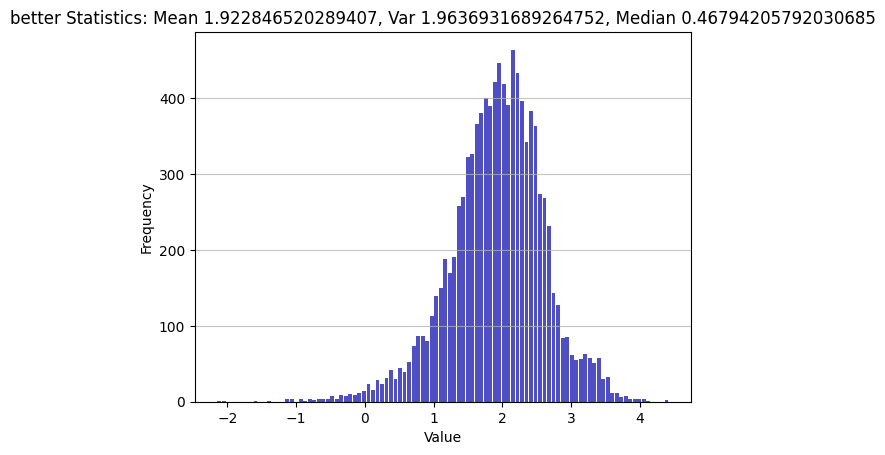

1.0


/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


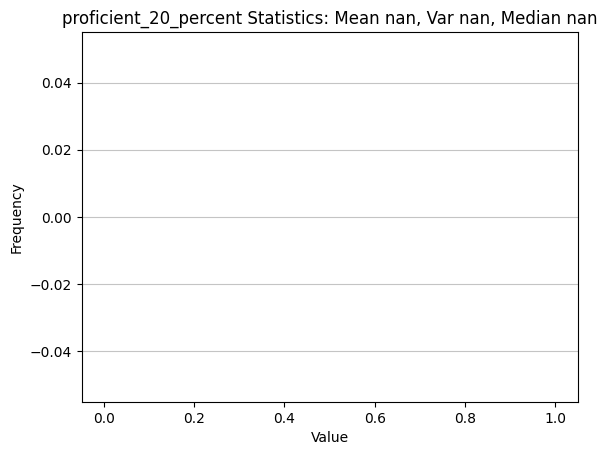

In [27]:
import matplotlib.pyplot as plt

for k, v in losses.items():
    print(np.sum(np.array(v) < 0) / len(v))
    plt.figure()
    x = [it for it in v if it > 0]
    n, bins, patches = plt.hist(x=np.log10(x), bins=100, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{} Statistics: Mean {}, Var {}, Median {}'.format(k, np.mean(np.log10(x)), np.median(np.log10(x)), np.var(np.log10(x))))
    plt.show()